# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [15]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [16]:
# 데이터셋 종류 : 
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [17]:
print(data.feature_names)
print(data.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [18]:
input = data.data
output = data.target

In [19]:
print(input.shape)
print(output.shape)

(178, 13)
(178,)


In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

In [22]:
print(x_train[0])
print(y_train[0])

#input 13개 (속성이 13개)
#y의 class는 3개 (0,1,2)

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [23]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [24]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

In [25]:
x_train.size()

torch.Size([124, 13])

In [26]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,256, bias=True), 
          nn.Sigmoid(),
          nn.Linear(256,128, bias=True),
          nn.Sigmoid(),
          nn.Linear(128,36, bias=True), 
          nn.Sigmoid(),
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [27]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,256, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(256)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()6
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64,36, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [28]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [29]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-28-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): Softmax(dim=None)
  )
)

In [30]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): Softmax(dim=None)
  )
)


In [31]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [32]:
print(x_test.dtype)
print(y_test.dtype)
print(x_train.dtype)
print(y_train.dtype)

torch.float32
torch.int64
torch.float32
torch.int64


In [33]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.5999865531921387
10 3.016019582748413
20 2.9513633251190186
30 2.9681317806243896
40 2.9643754959106445
50 2.923619508743286
60 2.928347110748291
70 2.9152989387512207
80 2.9200997352600098
90 3.015146017074585


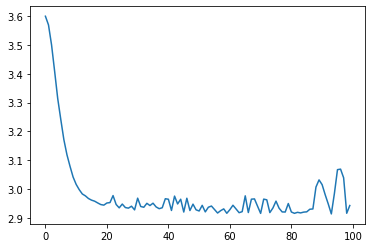

In [34]:
plt.plot(losses)
plt.show()

In [35]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [36]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.8506737e-01 1.4838447e-02 5.7730624e-05 1.2942576e-06 1.0544198e-06
 2.0409936e-06 3.7264238e-07 8.2130589e-07 7.0037026e-07 2.7202998e-07
 2.5409989e-07 9.5320138e-07 2.3730217e-06 7.3434654e-07 1.1567224e-06
 3.9765482e-07 1.2566525e-06 1.2001199e-06 3.1938253e-06 1.5841159e-06
 1.2985674e-06 2.3863317e-06 1.2879840e-06 8.3194112e-07 5.5356315e-07
 1.3494970e-06 1.8740458e-07 2.9554721e-07 1.6081110e-06 3.1662685e-07
 1.4986927e-06 3.7238797e-07 5.0728147e-07 1.4573282e-06 1.9265244e-06
 8.2147432e-07]
argmax를 한 후의 output은 0
accuracy는 0.6111111111111112


## 2번째 시도 (활성화 함수 tanh 로 변경)

In [37]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,256, bias=True), 
          nn.Tanh(),
          nn.Linear(256,128, bias=True),
          nn.Tanh(),
          nn.Linear(128,36, bias=True), 
          nn.Tanh(),
          ).to(device)

In [38]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,256, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Tanh(),
        nn.BatchNorm1d(256)
    )

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Tanh()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Tanh()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64,36, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [39]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-28-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Tanh()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): Softmax(dim=None)
  )
)

In [41]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [42]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.5852482318878174
10 2.964606761932373
20 2.9721596240997314
30 2.959660053253174
40 3.2269229888916016
50 3.2269227504730225
60 3.2269234657287598
70 3.226923942565918
80 3.226924419403076
90 3.2269234657287598


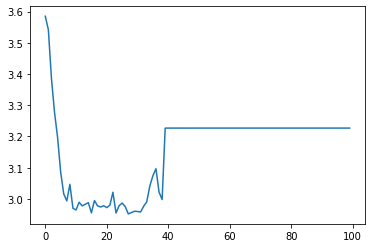

In [43]:
plt.plot(losses)
plt.show()

In [45]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [46]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.48963277e-08 9.99972224e-01 2.30057631e-05 3.47584219e-08
 9.05509694e-08 2.42061788e-07 5.10198333e-07 1.27392624e-07
 4.43972368e-07 1.51414270e-07 1.04988885e-07 7.15327246e-08
 3.62900550e-07 1.51389429e-07 1.87195397e-07 2.58603876e-08
 8.59916724e-08 1.83664724e-07 6.02607244e-08 1.15762560e-07
 1.50901656e-07 8.60709264e-08 1.09422778e-07 9.93425289e-08
 7.79479237e-08 1.30578242e-08 3.72678777e-08 1.61832560e-07
 3.73578324e-08 1.65519651e-07 1.35443699e-07 1.36073567e-07
 2.52496246e-08 1.15387920e-07 2.92167186e-07 1.84692439e-07]
argmax를 한 후의 output은 1
accuracy는 0.3888888888888889


## 3번째 시도 (활성화 함수 ReLU 로 변경)

In [49]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,256, bias=True), 
          nn.ReLU(),
          nn.Linear(256,128, bias=True),
          nn.ReLU(),
          nn.Linear(128,36, bias=True), 
          nn.ReLU(),
          ).to(device)

In [50]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,256, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.ReLU(),
        nn.BatchNorm1d(256)
    )

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64,36, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [51]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-28-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): Softmax(dim=None)
  )
)

In [52]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [53]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.545567274093628
10 2.9431962966918945
20 2.9231626987457275
30 2.9205267429351807
40 2.9204163551330566
50 2.9215641021728516
60 2.920477867126465
70 2.8540163040161133
80 2.8317196369171143
90 2.713399887084961


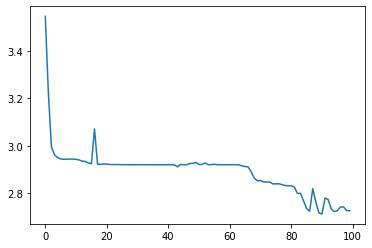

In [54]:
plt.plot(losses)
plt.show()

In [55]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [56]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
argmax를 한 후의 output은 0
accuracy는 0.8888888888888888


## 4번째 시도 (ReLU + 옵티마이저 SGD로 변경) 

In [57]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,256, bias=True), 
          nn.ReLU(),
          nn.Linear(256,128, bias=True),
          nn.ReLU(),
          nn.Linear(128,36, bias=True), 
          nn.ReLU(),
          ).to(device)

In [58]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,256, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Tanh(),
        nn.BatchNorm1d(256)
    )

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Tanh()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Tanh()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64,36, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [59]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-28-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Tanh()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): Softmax(dim=None)
  )
)

In [60]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [61]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 3.584549903869629
10 3.573739528656006
20 3.562317132949829
30 3.5463037490844727
40 3.5132384300231934
50 3.508772611618042
60 3.5349488258361816
70 3.5395214557647705
80 3.5212907791137695
90 3.4750638008117676


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


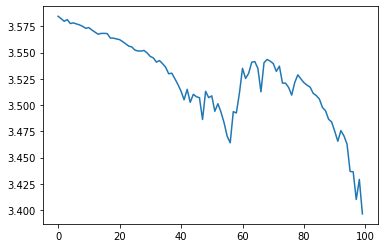

In [62]:
plt.plot(losses)
plt.show()

In [63]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [64]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.5501716  0.03514828 0.02971754 0.00658929 0.0068739  0.0130014
 0.01069856 0.02461694 0.01338783 0.00775758 0.01667805 0.00927033
 0.01567808 0.00818948 0.01208205 0.0082855  0.01676827 0.01238626
 0.01400816 0.00859364 0.00896937 0.02366553 0.01112956 0.00797993
 0.01272155 0.00868963 0.01224233 0.01470386 0.01346912 0.00704629
 0.01128265 0.00842132 0.00894295 0.01601426 0.00522384 0.00959511]
argmax를 한 후의 output은 0
accuracy는 0.3333333333333333


## 5번째 시도 (ReLU + ADAM + lr = 0.001 로 변경) acc = 0.9444 로 가장 높음.  

In [89]:
model = nn.Sequential(
          nn.Linear(13,256, bias=True), 
          nn.ReLU(),
          nn.Linear(256,128, bias=True),
          nn.ReLU(),
          nn.Linear(128,36, bias=True), 
          nn.ReLU(),
          ).to(device)

In [90]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,256, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Tanh(),
        nn.BatchNorm1d(256)
    )

    self.layer2 = nn.Sequential(
          nn.Linear(256,128, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Tanh()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(128,64, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Tanh()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(64,36, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [91]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-28-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Tanh()
  )
  (layer3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=64, out_features=36, bias=True)
    (1): Softmax(dim=None)
  )
)

In [92]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.001)

In [93]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.5806376934051514
10 3.320775270462036
20 3.067638874053955
30 2.9840333461761475
40 2.8998260498046875
50 2.8612024784088135
60 2.823242664337158
70 2.7304813861846924
80 2.6997146606445312
90 2.686249256134033


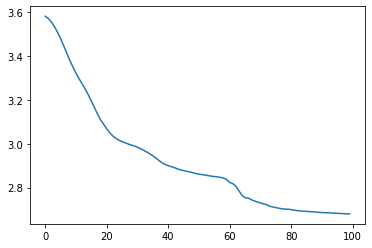

In [94]:
plt.plot(losses)
plt.show()

In [95]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [96]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9771309e-01 4.2860852e-06 3.5225024e-04 5.0265568e-05 9.4848372e-05
 4.4589004e-05 1.0039580e-04 4.9194114e-05 4.1142866e-05 4.2371110e-05
 5.3135038e-05 5.7843507e-05 3.6521542e-05 5.8882193e-05 7.0295617e-05
 3.8584702e-05 3.3271230e-05 1.5074709e-05 8.4532236e-05 5.5602311e-05
 1.0474825e-04 6.2041639e-05 5.9084694e-05 9.2893279e-05 5.7646965e-05
 2.7589842e-05 5.1571758e-05 7.0841343e-05 9.5331270e-05 4.8219797e-05
 5.2302727e-05 3.1099684e-05 6.4369357e-05 4.6680503e-05 1.1623182e-04
 2.3003402e-05]
argmax를 한 후의 output은 0
accuracy는 0.9444444444444444


# < 3주차 과제 2 : CNN 맛보기>

In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [3]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은?

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [5]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [6]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [7]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [8]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-4-006ecbc6c563>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.281531
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.296566
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.283896
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.254680
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.225545
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.203352
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.163291
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.097435
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.987547
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.939250
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.643016
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.588846
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.242997
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.943483
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.734167
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.708046
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.807304
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.733330
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.802525
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.577960
Train Epoch: 1 [12800/60000 (

<ipython-input-7-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1801, Accuracy: 9464/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.112169
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.078430
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.114706
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.216335
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.271478
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.175298
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.130358
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.228631
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.226365
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.084612
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.110400
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.157965
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.187044
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.225298
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.142487
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.269016
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.178463
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.436464
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.105639
Train Epoch: 2 [12